In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for charts
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import os
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import scipy.stats as stats

In [ ]:
Life_Expectancy_Data_df = pd.read_csv('Life Expectancy Data.csv')
Life_Expectancy_Data_df.columns = ['Country','Year','Status','Life Expectancy','Adult Mortality','Infant Deaths',
'Alcohol','Percentage Expenditure','Hepatitis B','Measles','BMI','Under-Five Deaths','Polio','Total Expenditure',
'Diphtheria','HIV/AIDS','GDP','Population','Thinness 1-19 Years','Thinness 5-9 Years',
'Income Composition of Resources','Schooling']
Life_Expectancy_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
Life_Expectancy_Data_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 Years                 34
Thinness 5-9 Years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

Renaming column names to appropriate names and checking for number of 
null values for each variable

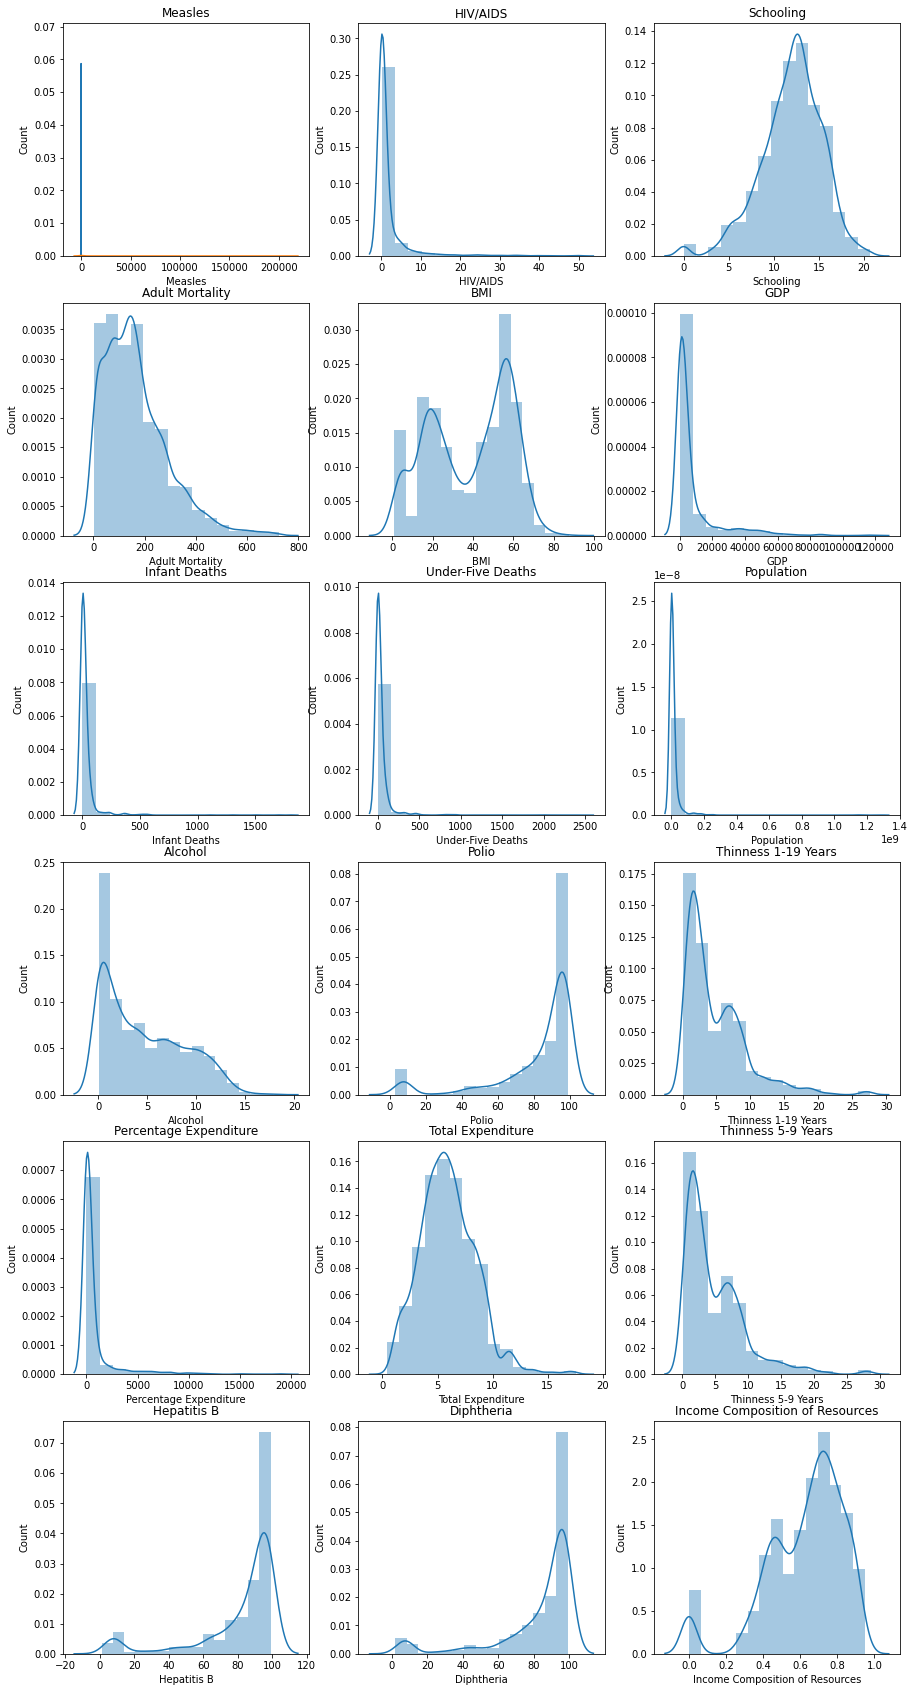

In [ ]:
warnings.filterwarnings("ignore")
features = Life_Expectancy_Data_df.iloc[:,3:].columns
fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=3)
count = 0
for i,col in enumerate(features):
  ax = sns.distplot(a=Life_Expectancy_Data_df[col],bins=15,kde=True,ax=axs[i%6,count])
  ax.set(xlabel=col,ylabel="Count")
  ax.set_title(col)
  if (i%6==0 and i>0):
    count+=1

Distribution plots to visualise each column and whether they are modal/bi-modal/multi-modal and if they are positively or negatively skewed.

In [ ]:
#imputer = SimpleImputer(missing_values = np.nan,  
#                        strategy ='most_frequent') 
#imputer = imputer.fit(Life_Expectancy_Data_df.iloc[:,3:]) 
#Life_Expectancy_Data_df.iloc[:,3:] = imputer.transform(Life_Expectancy_Data_df.iloc[:,3:])
#Life_Expectancy_Data_df.isnull().sum()

In [ ]:
fill_list = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling']

filter_list = ['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling']

country_list = Life_Expectancy_Data_df.Country.unique()
for country in country_list:
    Life_Expectancy_Data_df.loc[Life_Expectancy_Data_df['Country'] == country,fill_list] = Life_Expectancy_Data_df.loc[Life_Expectancy_Data_df['Country'] == country,fill_list].interpolate()
#Life_Expectancy_Data_df.dropna(inplace=True)

for name in filter_list: 
  Life_Expectancy_Data_df[name].fillna(Life_Expectancy_Data_df[name].mode().iloc[0], inplace=True)

Smoothing the data and getting rid of null values using mode to fill the missing values as the graphs above displayed skewed data in most cases

In [ ]:
Life_Expectancy_Data_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 Years                0
Thinness 5-9 Years                 0
Income Composition of Resources    0
Schooling                          0
dtype: int64

Checking number of null values after imputation using mode

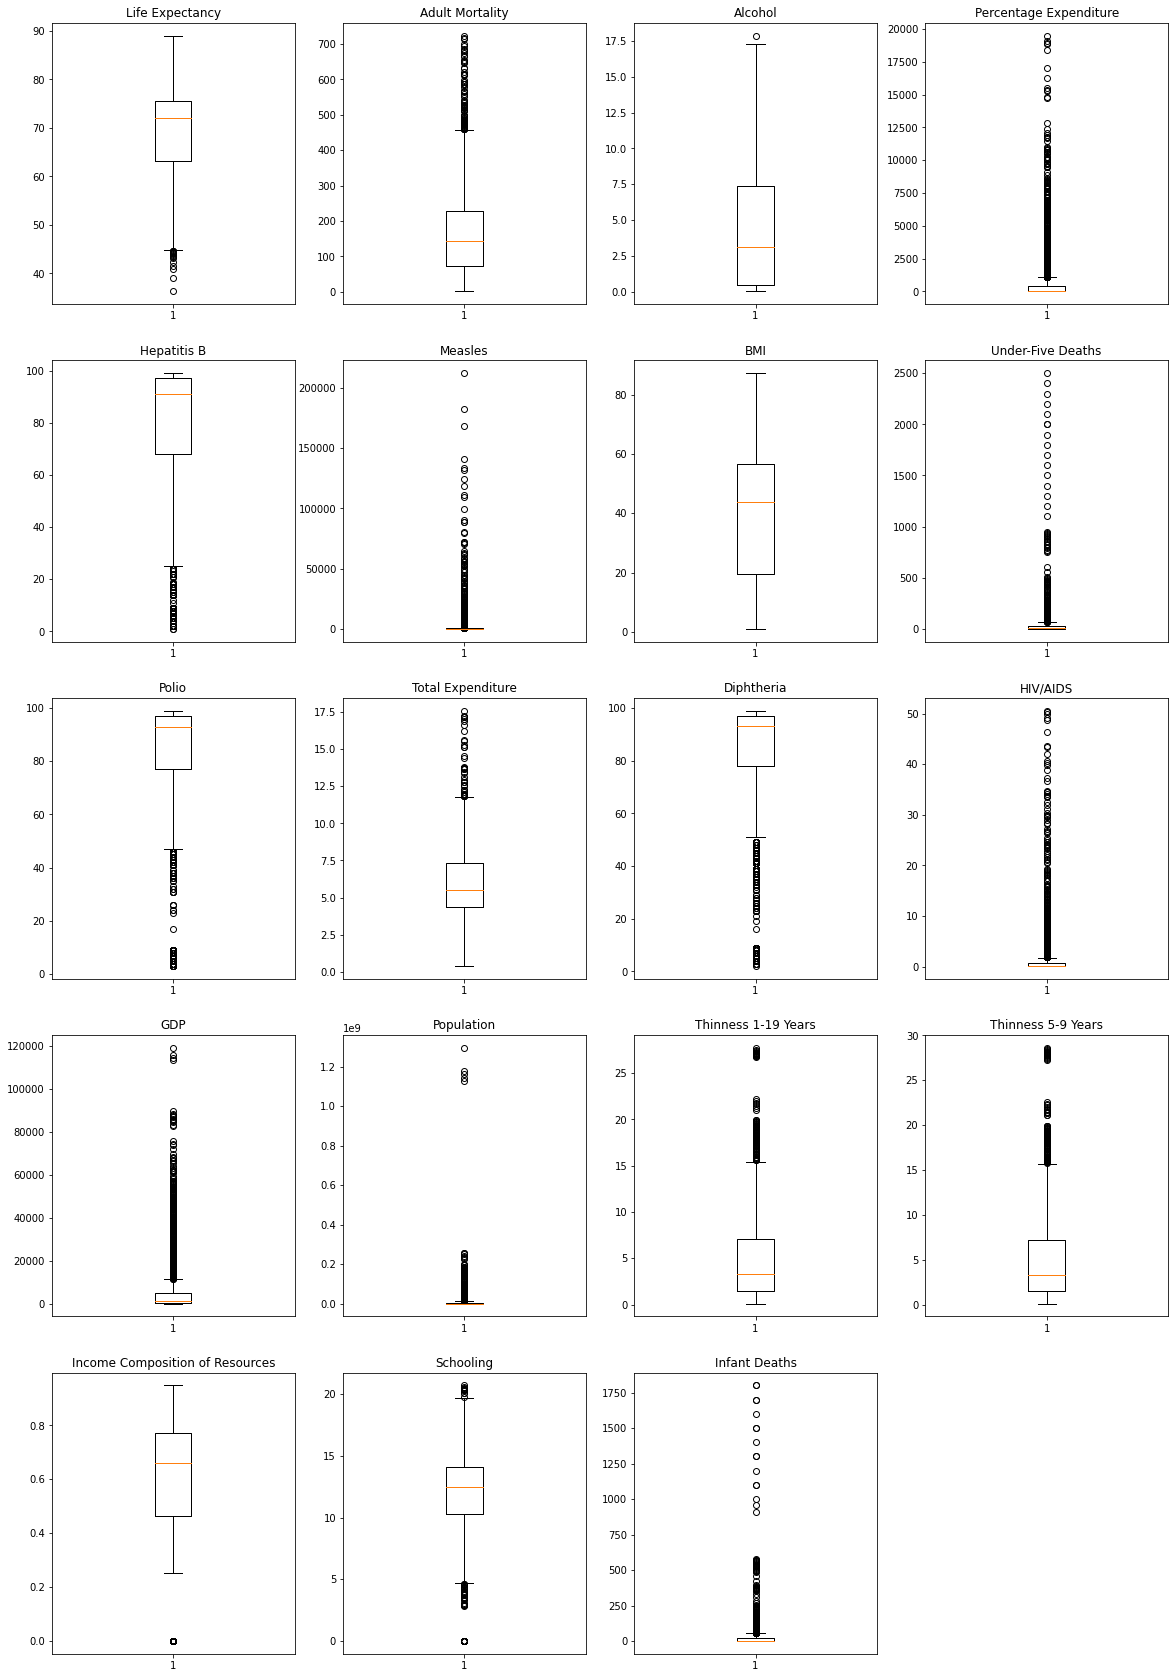

In [ ]:
col_dict = {'Life Expectancy':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'Percentage Expenditure': 4, 'Hepatitis B': 5,
       'Measles' : 6, 'BMI': 7, 'Under-Five Deaths' : 8, 'Polio' : 9, 'Total Expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'Thinness 1-19 Years' :15, 'Thinness 5-9 Years' :16,
       'Income Composition of Resources' : 17, 'Schooling' :18, 'Infant Deaths':19}

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Life_Expectancy_Data_df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(Life_Expectancy_Data_df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((Life_Expectancy_Data_df[variable] > max_val) | (Life_Expectancy_Data_df[variable] < min_val))[0]))))
      #,len((np.where((Life_Expectancy_Data_df[variable] > max_val) | (Life_Expectancy_Data_df[variable] < min_val))[0]))*100/2938))

Number of outliers and percentage of it in Life Expectancy : 0
Number of outliers and percentage of it in Adult Mortality : 0
Number of outliers and percentage of it in Alcohol : 0
Number of outliers and percentage of it in Percentage Expenditure : 389
Number of outliers and percentage of it in Hepatitis B : 0
Number of outliers and percentage of it in Measles : 542
Number of outliers and percentage of it in BMI : 0
Number of outliers and percentage of it in Under-Five Deaths : 394
Number of outliers and percentage of it in Polio : 0
Number of outliers and percentage of it in Total Expenditure : 0
Number of outliers and percentage of it in Diphtheria : 0
Number of outliers and percentage of it in HIV/AIDS : 542
Number of outliers and percentage of it in GDP : 0
Number of outliers and percentage of it in Population : 0
Number of outliers and percentage of it in Thinness 1-19 Years : 0
Number of outliers and percentage of it in Thinness 5-9 Years : 0
Number of outliers and percentage of 

Getting number of outliers for each variable

Next we are going to use winsorization to get rid of outliers. 

Winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

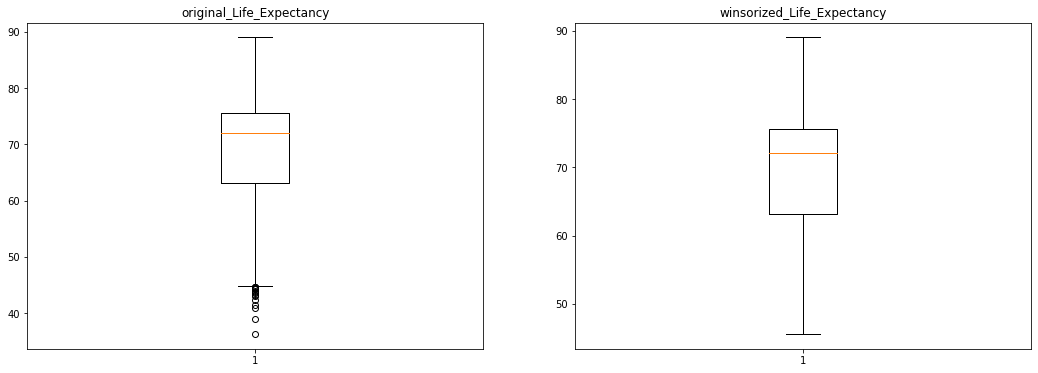

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = Life_Expectancy_Data_df['Life Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(Life_Expectancy_Data_df['Life Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

Text(0.5, 1.0, 'winsorized_Adult_Mortality')

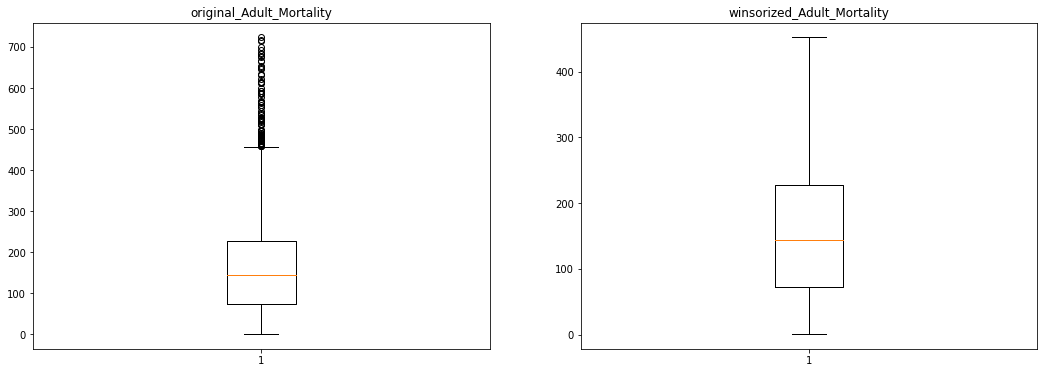

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = Life_Expectancy_Data_df['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(Life_Expectancy_Data_df['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

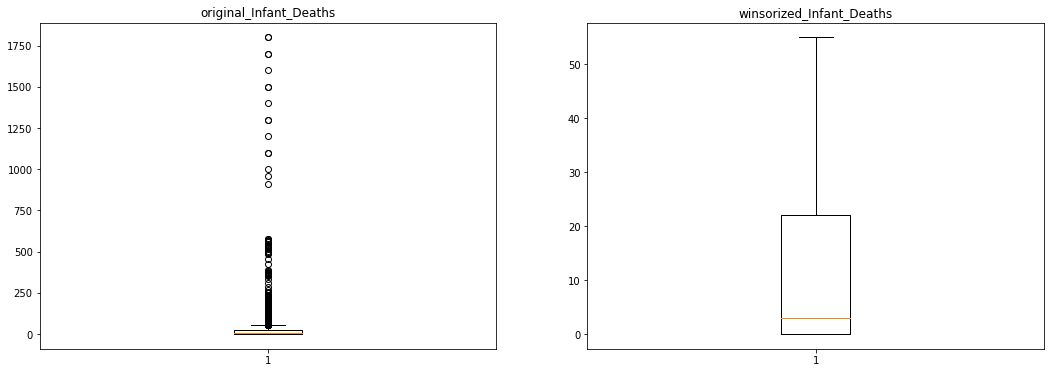

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = Life_Expectancy_Data_df['Infant Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(Life_Expectancy_Data_df['Infant Deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

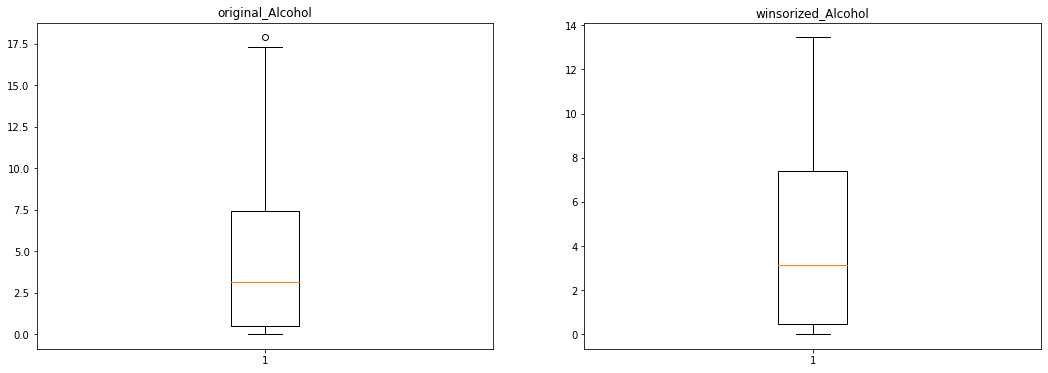

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = Life_Expectancy_Data_df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(Life_Expectancy_Data_df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

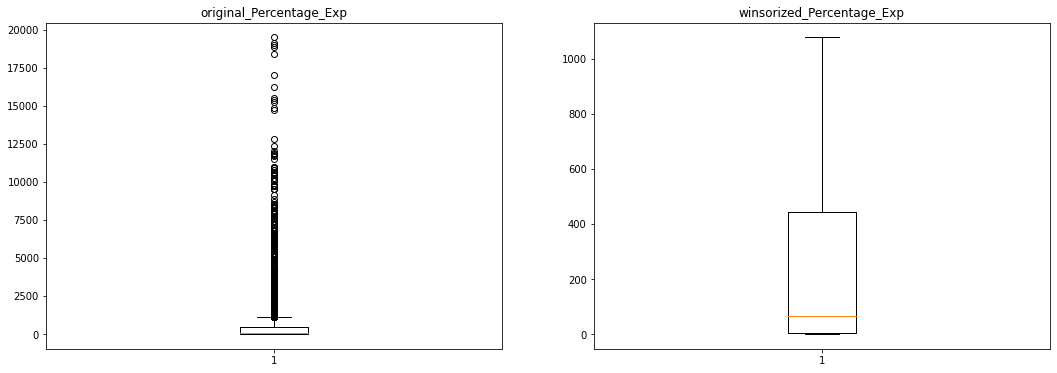

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = Life_Expectancy_Data_df['Percentage Expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(Life_Expectancy_Data_df['Percentage Expenditure'],(0,0.135))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

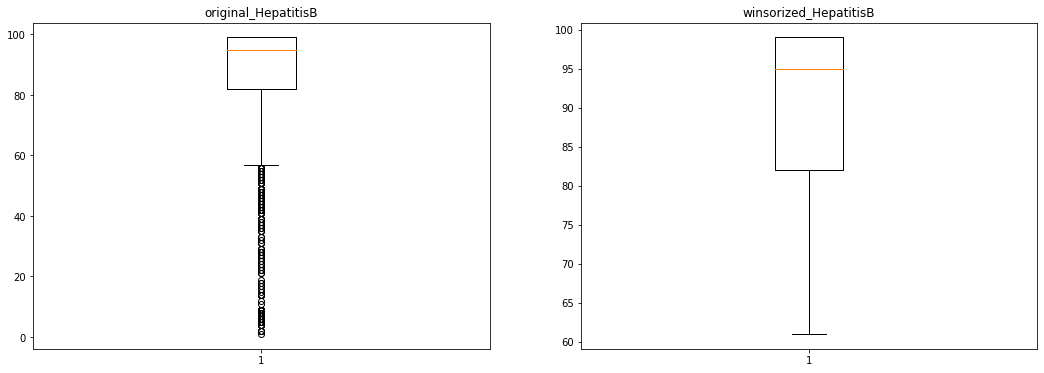

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = Life_Expectancy_Data_df['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(Life_Expectancy_Data_df['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

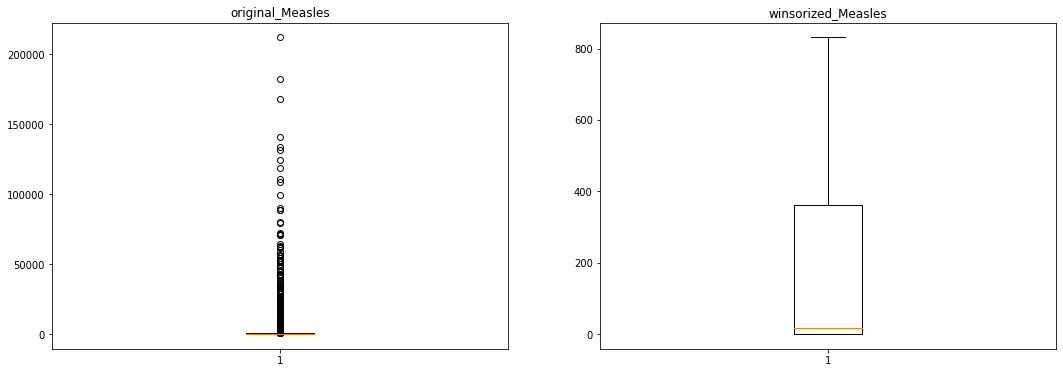

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = Life_Expectancy_Data_df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(Life_Expectancy_Data_df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

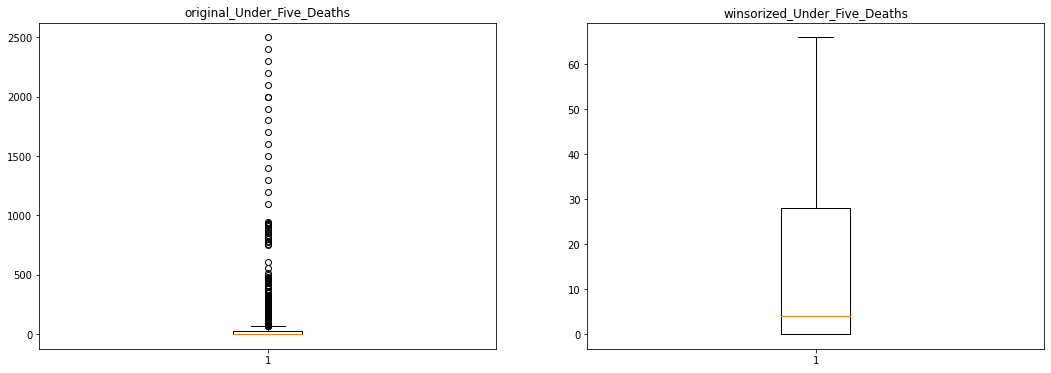

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = Life_Expectancy_Data_df['Under-Five Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(Life_Expectancy_Data_df['Under-Five Deaths'],(0,0.14))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

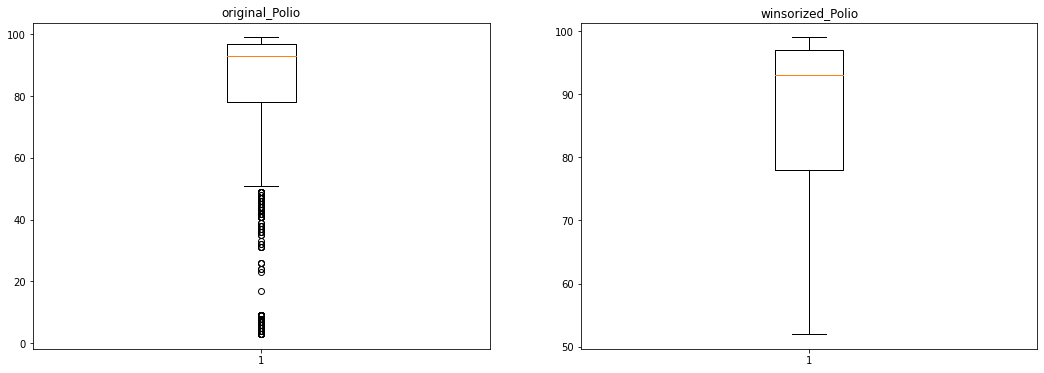

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = Life_Expectancy_Data_df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(Life_Expectancy_Data_df['Polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

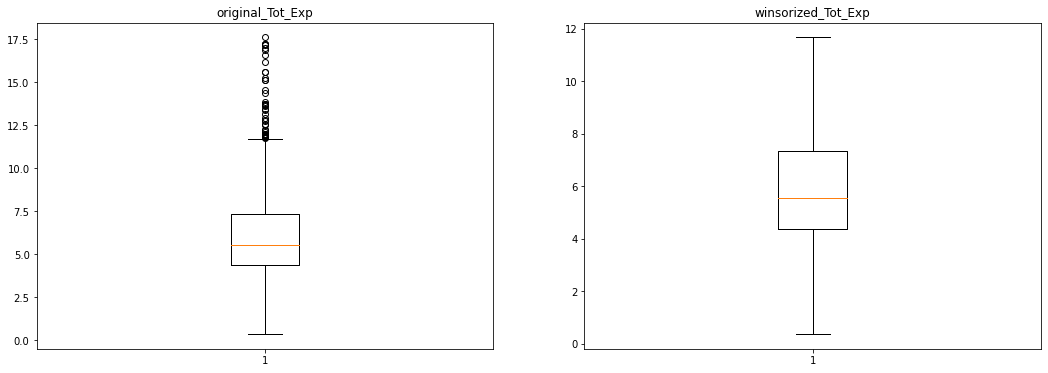

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = Life_Expectancy_Data_df['Total Expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(Life_Expectancy_Data_df['Total Expenditure'],(0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

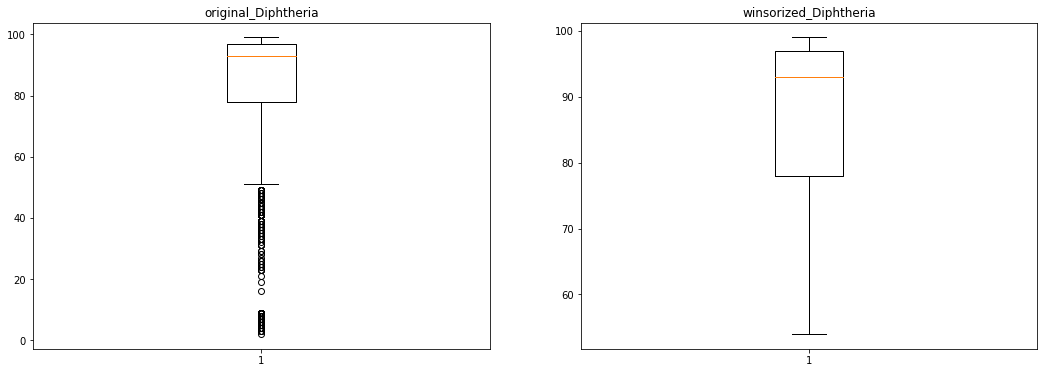

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = Life_Expectancy_Data_df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(Life_Expectancy_Data_df['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

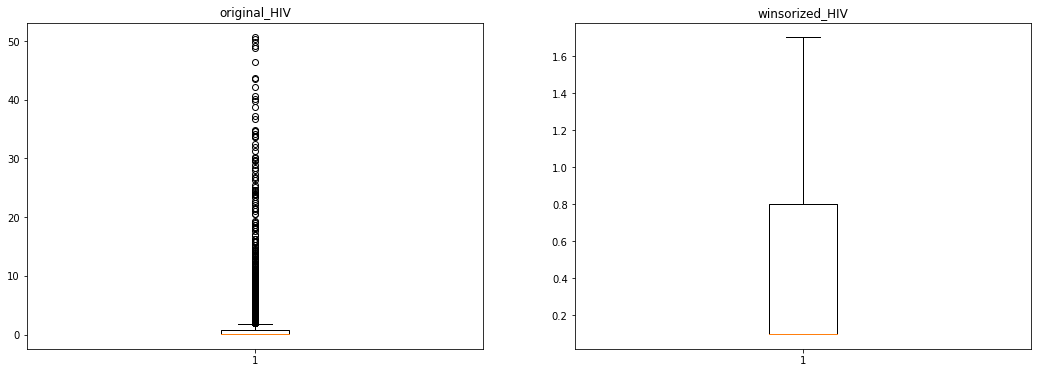

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = Life_Expectancy_Data_df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(Life_Expectancy_Data_df['HIV/AIDS'],(0,0.19))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

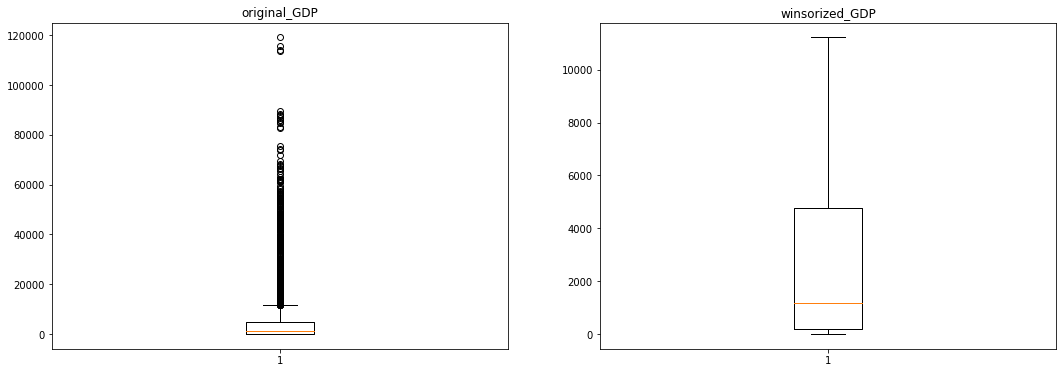

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = Life_Expectancy_Data_df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(Life_Expectancy_Data_df['GDP'],(0,0.15))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

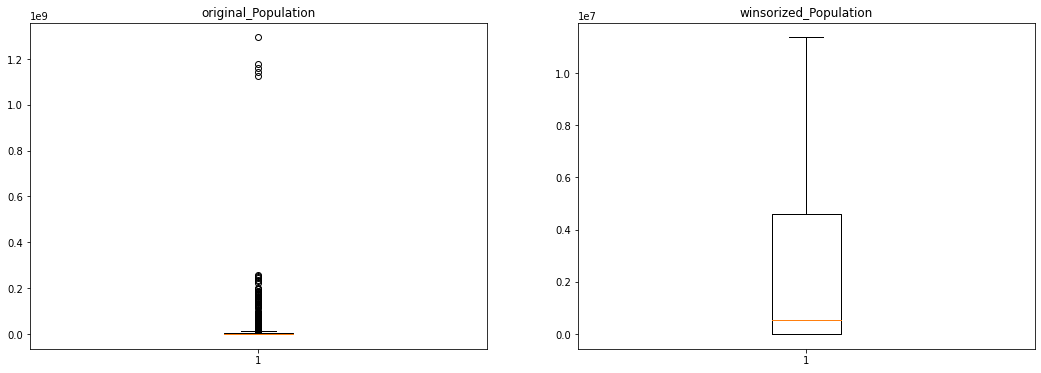

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = Life_Expectancy_Data_df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(Life_Expectancy_Data_df['Population'],(0,0.15))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

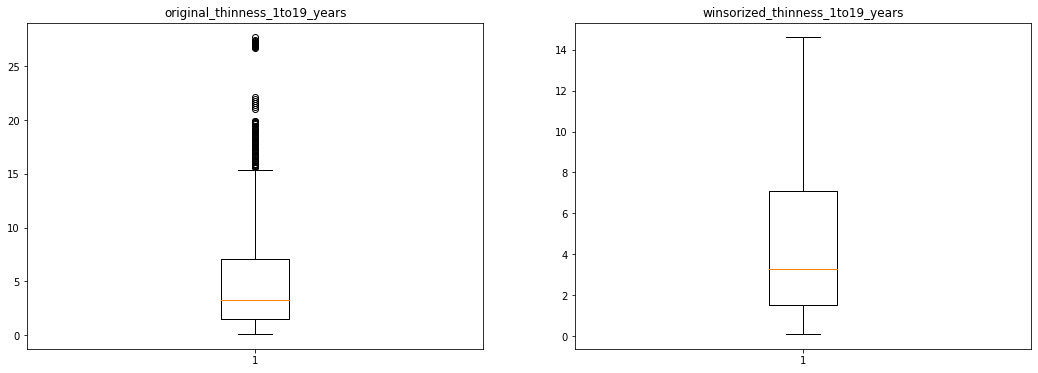

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = Life_Expectancy_Data_df['Thinness 1-19 Years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(Life_Expectancy_Data_df['Thinness 1-19 Years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

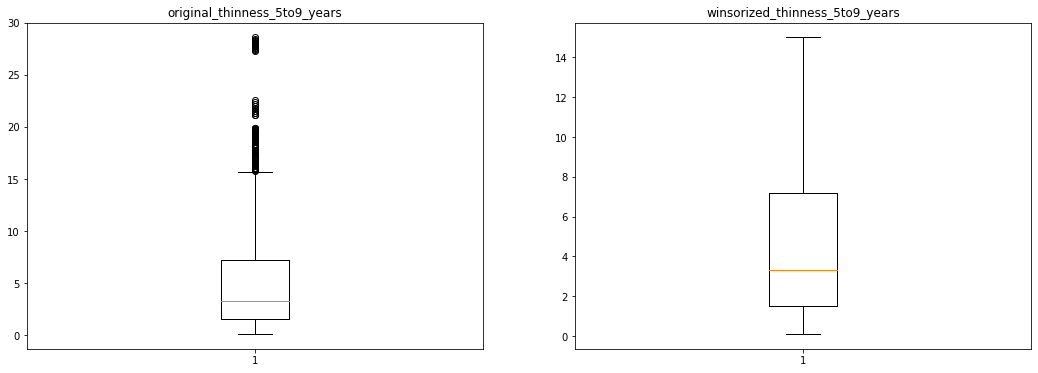

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = Life_Expectancy_Data_df['Thinness 5-9 Years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(Life_Expectancy_Data_df['Thinness 5-9 Years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

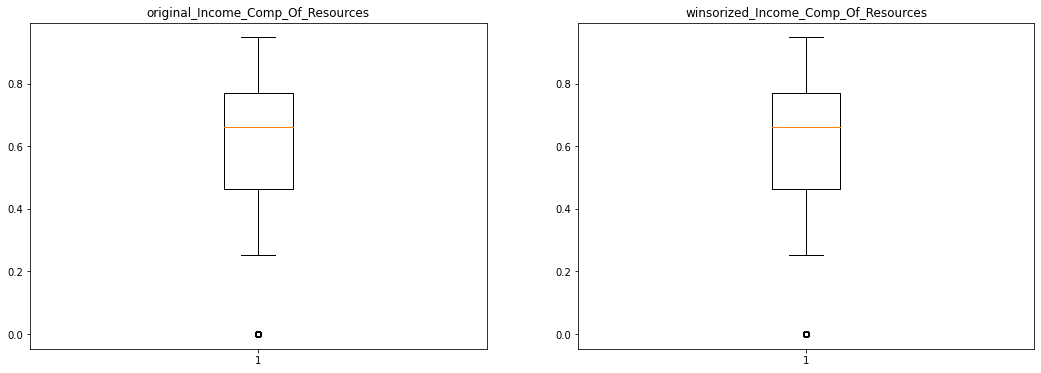

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = Life_Expectancy_Data_df['Income Composition of Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(Life_Expectancy_Data_df['Income Composition of Resources'],(0.1,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

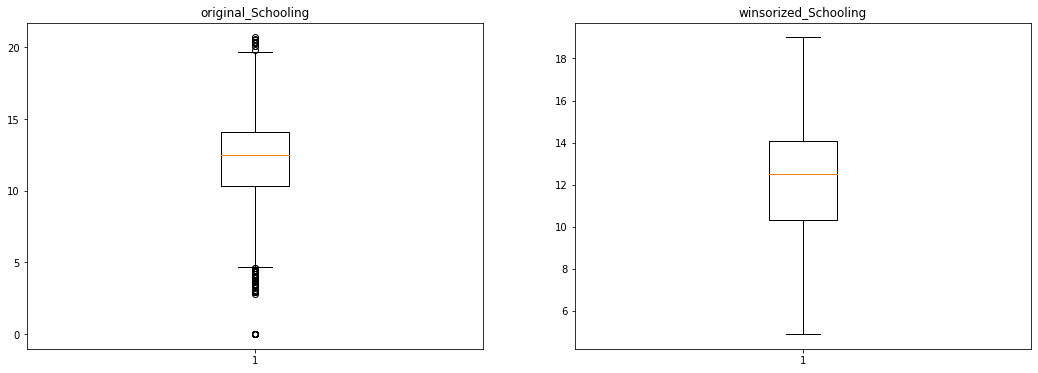

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = Life_Expectancy_Data_df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(Life_Expectancy_Data_df['Schooling'],(0.025,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [ ]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,
winsorized_Measles,winsorized_Infant_Deaths, winsorized_Percentage_Exp, winsorized_HepatitisB,
winsorized_Under_Five_Deaths, winsorized_Polio, winsorized_Tot_Exp, winsorized_Diphtheria,
winsorized_HIV, winsorized_GDP, winsorized_Population, winsorized_thinness_1to19_years,
winsorized_thinness_5to9_years, winsorized_Income_Comp_Of_Resources, winsorized_Schooling]

name_list = ["winsorized_Life_Expectancy","winsorized_Adult_Mortality","winsorized_Alcohol",
"winsorized_Measles","winsorized_Infant_Deaths", "winsorized_Percentage_Exp", "winsorized_HepatitisB",
"winsorized_Under_Five_Deaths", "winsorized_Polio", "winsorized_Tot_Exp", "winsorized_Diphtheria",
"winsorized_HIV", "winsorized_GDP", "winsorized_Population", "winsorized_thinness_1to19_years",
"winsorized_thinness_5to9_years", "winsorized_Income_Comp_Of_Resources", "winsorized_Schooling"]

for index,variable in enumerate(winsorized_list):
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    #print(variable[i])
    print("Number of outliers after winsorization in {} : {}"
.format(name_list[index],len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization in winsorized_Life_Expectancy : 0
Number of outliers after winsorization in winsorized_Adult_Mortality : 0
Number of outliers after winsorization in winsorized_Alcohol : 0
Number of outliers after winsorization in winsorized_Measles : 0
Number of outliers after winsorization in winsorized_Infant_Deaths : 0
Number of outliers after winsorization in winsorized_Percentage_Exp : 0
Number of outliers after winsorization in winsorized_HepatitisB : 0
Number of outliers after winsorization in winsorized_Under_Five_Deaths : 0
Number of outliers after winsorization in winsorized_Polio : 0
Number of outliers after winsorization in winsorized_Tot_Exp : 0
Number of outliers after winsorization in winsorized_Diphtheria : 0
Number of outliers after winsorization in winsorized_HIV : 0
Number of outliers after winsorization in winsorized_GDP : 0
Number of outliers after winsorization in winsorized_Population : 0
Number of outliers after winsorization in winsorized

Making sure that all outliers have been dealt with.

In [ ]:
Life_Expectancy_Data_df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
Life_Expectancy_Data_df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
Life_Expectancy_Data_df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
Life_Expectancy_Data_df['winsorized_Alcohol'] = winsorized_Alcohol
Life_Expectancy_Data_df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
Life_Expectancy_Data_df['winsorized_HepatitisB'] = winsorized_HepatitisB
Life_Expectancy_Data_df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
Life_Expectancy_Data_df['winsorized_Polio'] = winsorized_Polio
Life_Expectancy_Data_df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
Life_Expectancy_Data_df['winsorized_Diphtheria'] = winsorized_Diphtheria
Life_Expectancy_Data_df['winsorized_HIV'] = winsorized_HIV
Life_Expectancy_Data_df['winsorized_GDP'] = winsorized_GDP
Life_Expectancy_Data_df['winsorized_Population'] = winsorized_Population
Life_Expectancy_Data_df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
Life_Expectancy_Data_df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
Life_Expectancy_Data_df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
Life_Expectancy_Data_df['winsorized_Schooling'] = winsorized_Schooling
Life_Expectancy_Data_df['winsorized_Measles'] = winsorized_Measles

Life_Expectancy_Data_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,263.0,58.0,0.01,71.279624,65.0,79.0,47.0,8.16,65.0,0.1,584.259210,12654621.0,14.6,15.0,0.479,10.1,831.0
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,271.0,58.0,0.01,73.523582,62.0,79.0,58.0,8.18,62.0,0.1,612.696514,327582.0,14.6,15.0,0.476,10.0,492.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,268.0,58.0,0.01,73.219243,64.0,79.0,62.0,8.13,64.0,0.1,631.744976,12654621.0,14.6,15.0,0.470,9.9,430.0
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,272.0,58.0,0.01,78.184215,67.0,79.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,14.6,15.0,0.463,9.8,831.0
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,275.0,58.0,0.01,7.097109,68.0,79.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,14.6,15.0,0.454,9.5,831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,45.6,452.0,27.0,4.36,0.000000,68.0,42.0,67.0,7.13,65.0,2.3,454.366654,12654621.0,9.4,9.4,0.407,9.2,31.0
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,45.6,452.0,26.0,4.06,0.000000,61.0,41.0,47.0,6.52,68.0,2.3,453.351155,12633897.0,9.8,9.9,0.418,9.5,831.0
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,45.6,73.0,25.0,4.43,0.000000,73.0,40.0,73.0,6.53,71.0,2.3,57.348340,125525.0,1.2,1.3,0.427,10.0,304.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.6,452.0,25.0,1.72,0.000000,76.0,39.0,76.0,6.16,75.0,2.3,548.587312,12366165.0,1.6,1.7,0.427,9.8,529.0


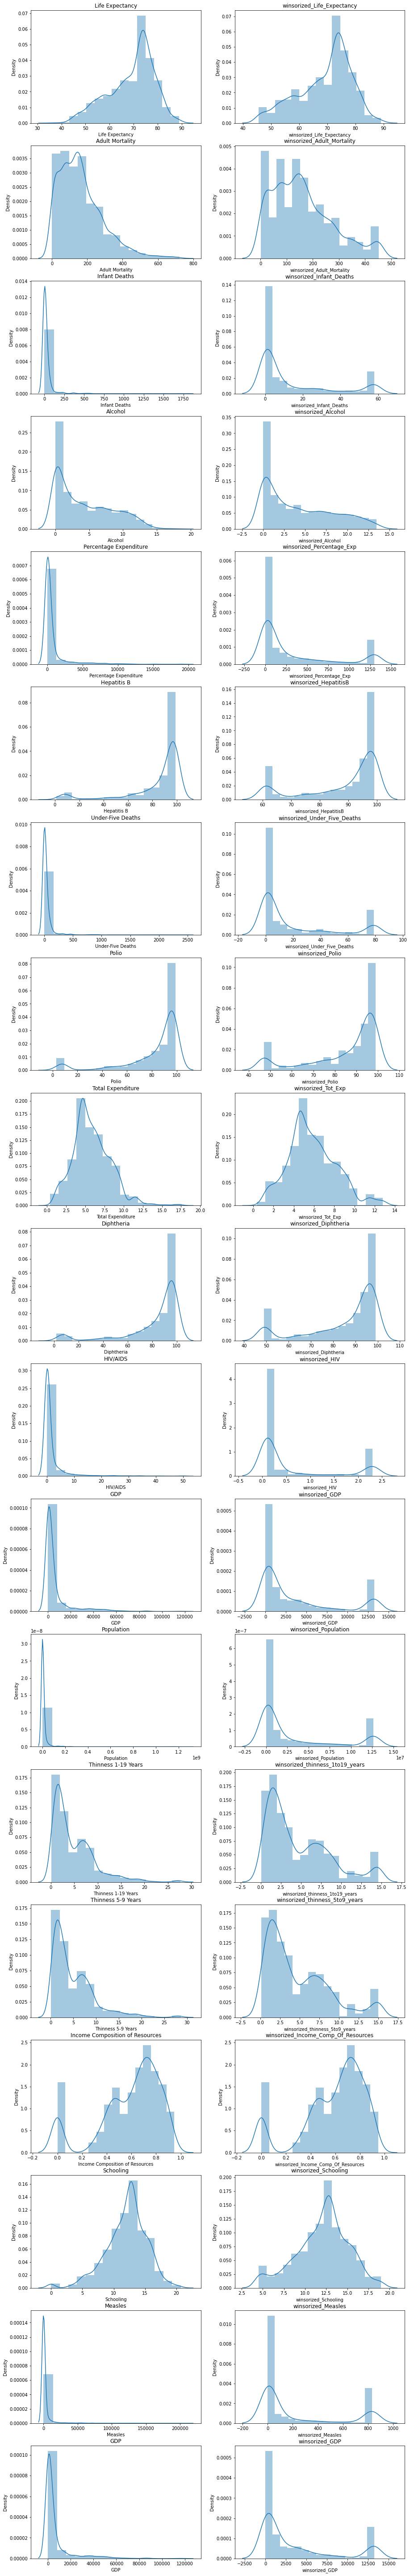

In [ ]:
all_col = ['Life Expectancy','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','Infant Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage Expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','Under-Five Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total Expenditure',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','Thinness 1-19 Years','winsorized_thinness_1to19_years','Thinness 5-9 Years',
         'winsorized_thinness_5to9_years','Income Composition of Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,105))

for i in range(len(all_col)):
  #ax = sns.distplot(world_happiness_report_df["Happiness Score"],bins=10)
    plt.subplot(19,2,i+1)
    sns.distplot(Life_Expectancy_Data_df[all_col[i]],bins= 15)
    plt.title(all_col[i])

plt.show()

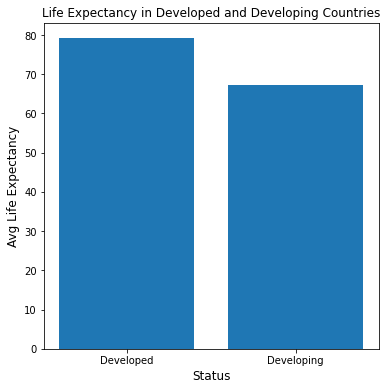

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(Life_Expectancy_Data_df.groupby('Status')['Status'].count().index,Life_Expectancy_Data_df.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy in Developed and Developing Countries")
plt.show()

Checking to see the difference in Average life expectancy between Developed and Developing countries

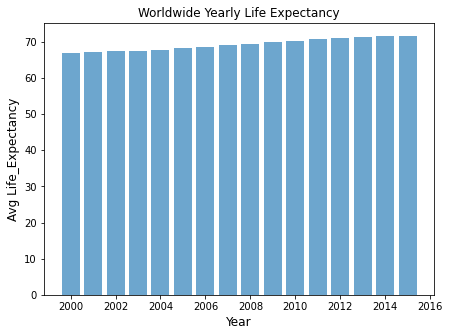

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(Life_Expectancy_Data_df.groupby('Year')['Year'].count().index,Life_Expectancy_Data_df.groupby('Year')['winsorized_Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Worldwide Yearly Life Expectancy")
plt.show()

Finding a correlation between time (in years) and the increase average life expectancy

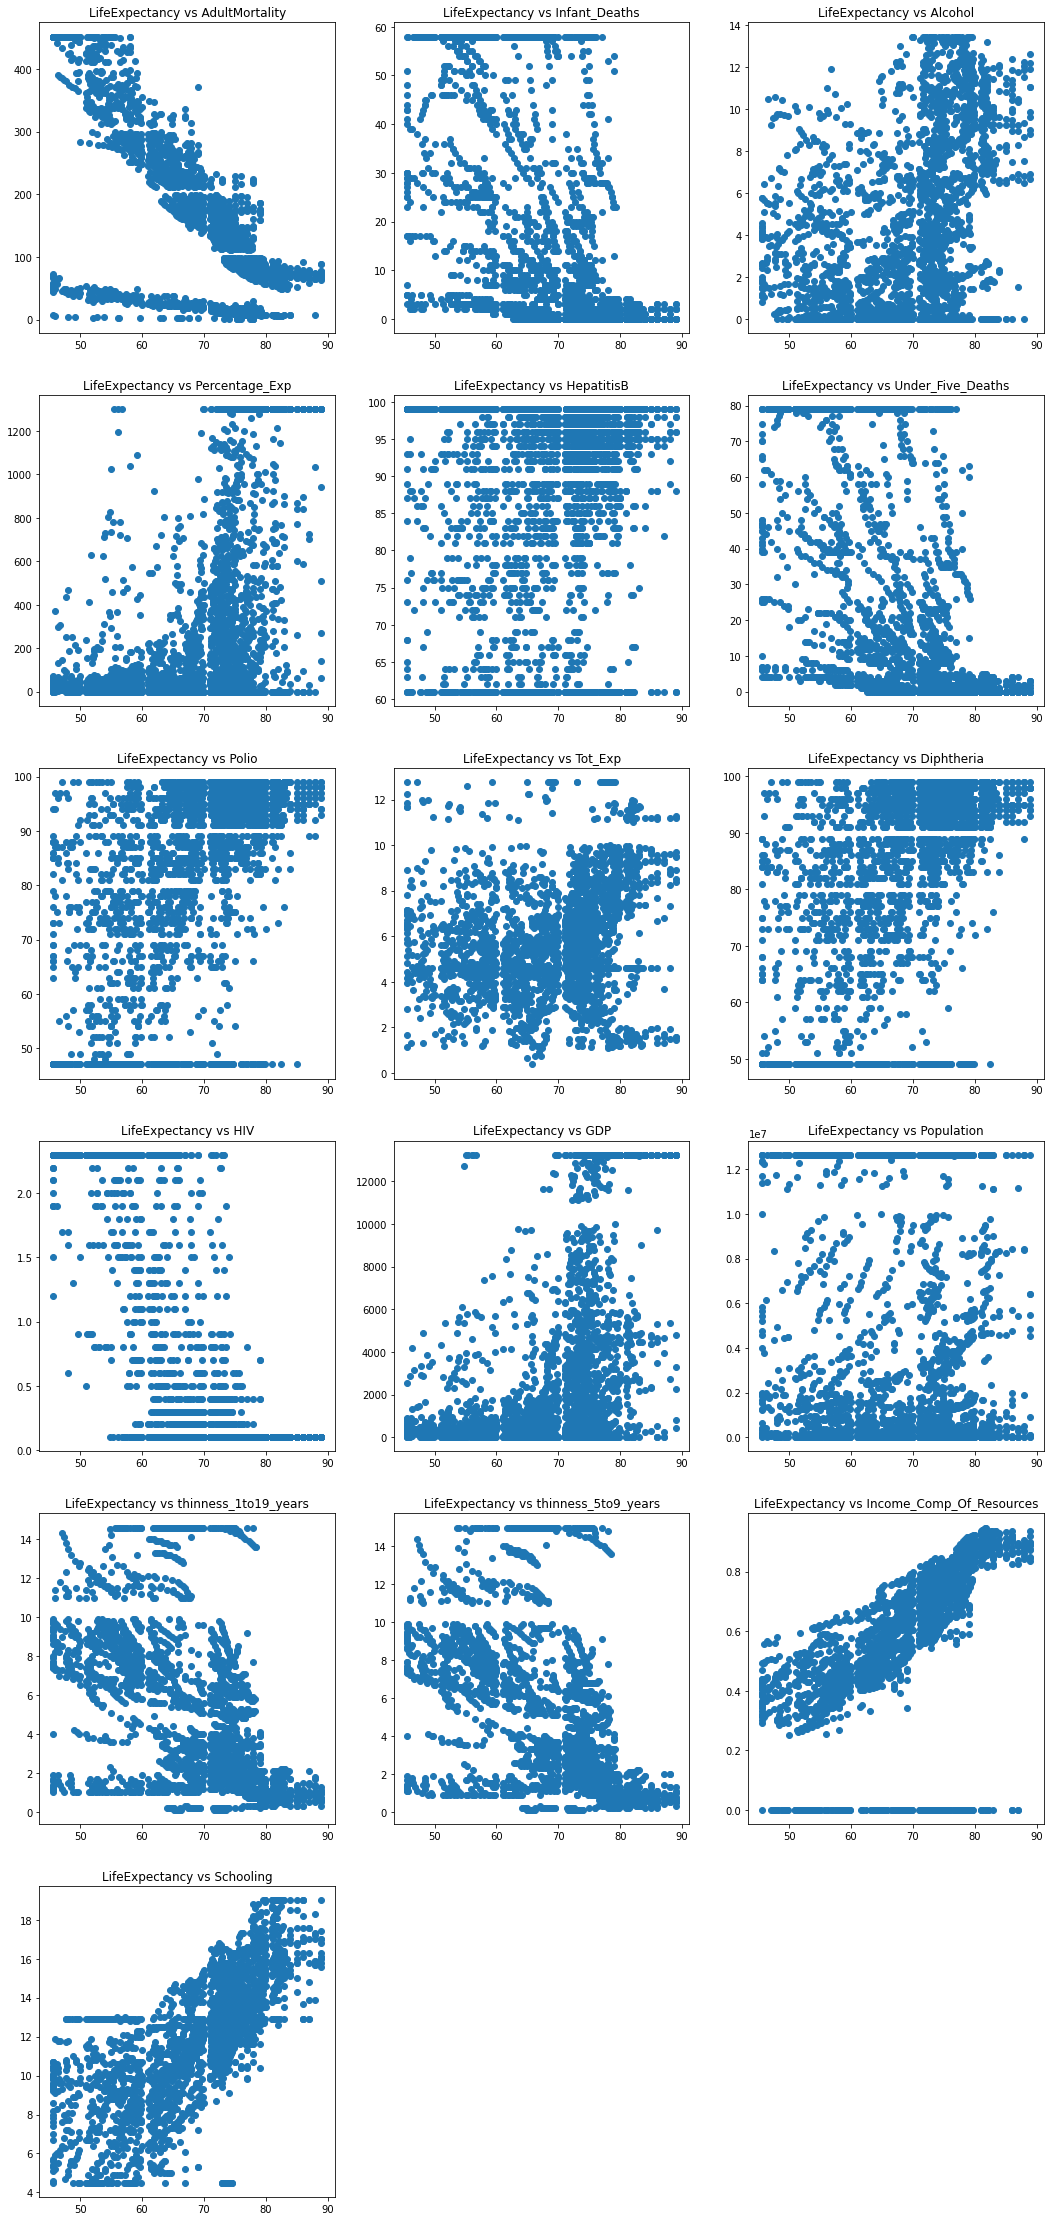

In [ ]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

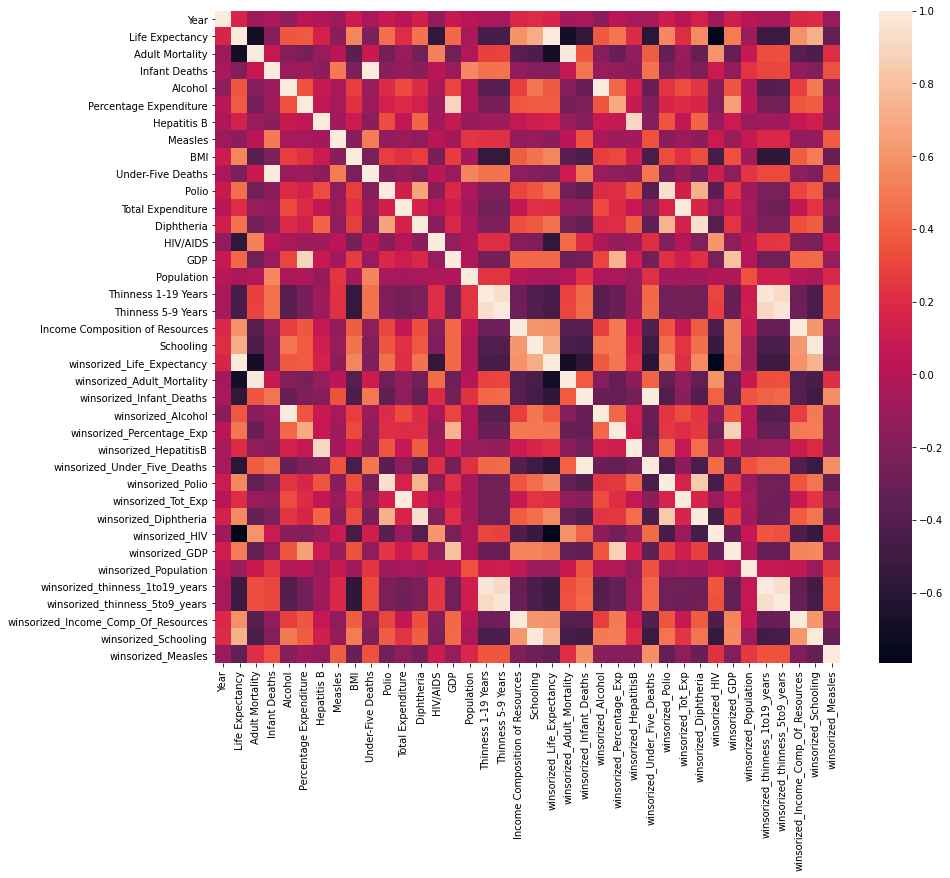

In [ ]:

plt.figure(figsize=(14,12))
sns.heatmap(Life_Expectancy_Data_df.corr())
